# [E-09] 폐렴아 기다려라!

딥러닝 기술이 산업적으로 명확한 용도를 입증한 도메인 중 하나로 **의료 분야**를 들 수 있다. 의료 영상을 분석하는 일은 전문적인 훈련을 받은 숙련된 의료 인력만 가능한 일이지만, 최근의 발달된 딥러닝 기술은 숙련자 수준 이상의 정확도를 바탕으로 영상분석 인력의 개인적 편차, 주관적 판단, 피로에 의한 오진 등의 부정확성을 극복할 수 있는 좋은 대안으로 인정받고 있지만, 의료 영상을 분석하는 것은 **일반적인 이미지 처리와는 다소 다른 특징이 있다.**
<br>
<br>
* 의료 영상 이미지는 개인 정보 보호 등의 이슈로 데이터를 구하는 게 어려움
* 라벨링 작업 자체가 전문적 지식을 필요로 해서 데이터셋 구축 비용이 비싸다.
* 희귀 질병을 다루는 경우 데이터를 입수하는 것 자체가 힘들다.
* 음성/양성 데이터간 imbalance가 심하다. 그래서 학습에 주의가 필요함.
* 이미지만으로 진단이 쉽지 않아 다른 데이터와 결합해서 해석해야 할 수도 있다.
<br>
<br>
그래서 의료 영상 처리를 위해서는 딥러닝 영상처리 기술뿐 아니라, 의료 도메인 지식 및 의료 영상에 대한 명확한 이해가 필요하다.
<br>
그리고 인공지능에 의한 의료 사고 발생시 누가 책임을 질 것인지에 대한 논란 또한 있는 것 같다.

***

### 순서
<br>
1. 이론
<br>
2. 실습
<br>
3. 프로젝트
<br>
4. 마무리
<br>
5. 회고

***

## 1. 이론

### 1-1. 의료 영상의 종류

* x-ray
    * 전자를 물체에 충돌시킬 때 발생하는 투과력이 강한 복사선(전자기파)을 말한다.
    * 방사선의 일종으로 지방, 근육, 천, 종이 같이 밀도가 낮은 것은 수월하게 통과한다.
    * 다만 밀도가 높은 뼈, 금속 같은 물질은 잘 통과하지 못한다.

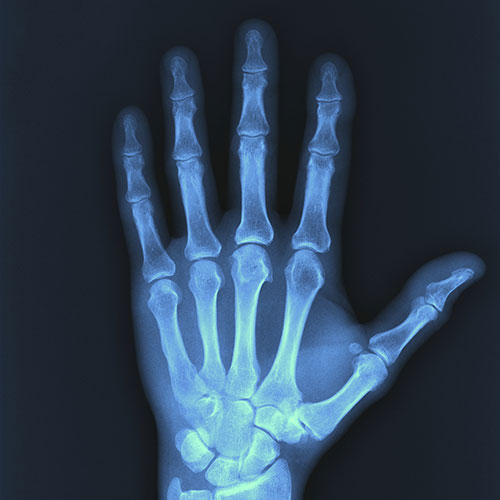

* CT
    * Computed Tomography의 줄임말
    * 환자를 중심으로 X-ray를 빠르게 회전하여 3D 이미지를 만든다.
    * 환자의 3차원 이미지를 형성해 기본 구조는 물론 가능한 종양 또는 이상을 쉽게 식별, 위치를 파악한다.
    * 단층 촬영 이미지 또는 신체의 단면 이미지인 'Slice'는 기존의 X-ray보다 자세한 정보를 포함한다.

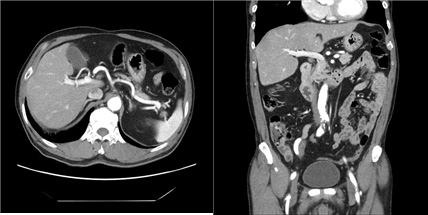

* MRI
    * Magnetic Resonance Imaging(자기 공명 영상)의 줄임말
    * 신체의 해부학적 과정과 생리적 과정을 보기 위해 사용하는 의료 영상 기술.
    * 강한 자기장을 사용해 신체 기관의 이미지를 생성한다.
    * CT, X-RAY와 달리 **방사선을 사용하지 않아서 방사선의 위험성에서 보다 안전.**

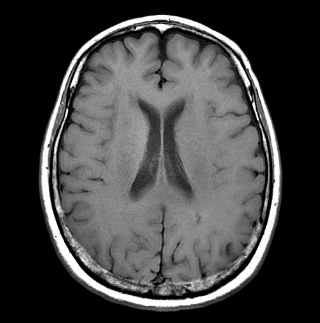

### 1-2. X-RAY 이미지 자세히 보기

이번 노드에서는 X-RAY 이미지를 기반으로 하는 폐렴 진단 딥러닝 모델을 제작할 예정이다. 따라서 X-ray 이미지를 이해하는 것이 중요한데, 이를 위해 X-RAY 영상 촬영을 위해 사용되는 자세 분류 체계를 이해는 것이 중요하다.

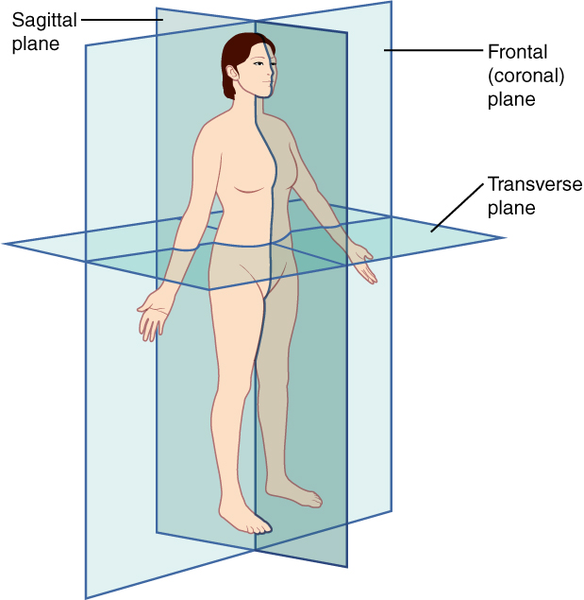

위의 이미지에 따르면 의료 영상 촬영은 인체를 세 방향의 단면으로 나누어 진행된다.
<br>
<br>
* Sagittal plane: **시상면.** 사람을 왼쪽과 오른쪽을 나누는 면이다.
* Coronal(Frontal) plane: **관상면.** 인체를 앞뒤로 나누는 면.
* Transverse plane: **횡단면(수평면).** 인체를 상하로 나누는 면.

* Sagittal plane(시상면)

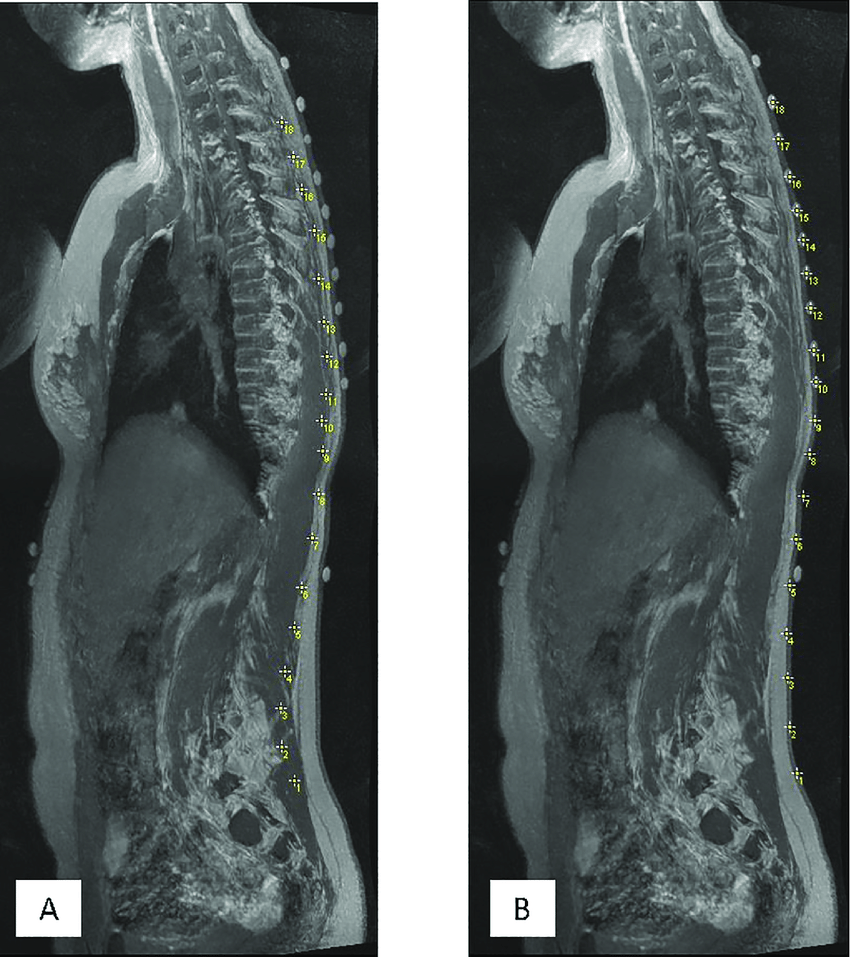

* Coronal(Frontal) plane(관상면)

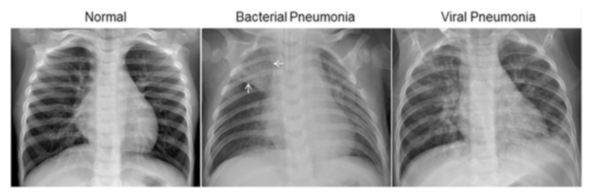

* Transverse plane(횡단면): 횡단면의 경우 이미지 자체가 ct와 비슷해서 예시를 찾기가 힘들다.

* 해부학적 위치
    * 오른쪽과 왼쪽에 대해서 주의깊게 볼 필요가 있음
    * 정면을 보고 있는 것을 가정하며 본다. 이 부분은 뇌를 수술하는 의사가 환자의 머리 위에 앉아 수술을 하는데, 그 때 의사의 관점으로 우뇌와 좌뇌를 구분했다는 얘기를 어디서 들은 기억이 있는 것 같기도...아무튼 **이미지를 보는 사람의 입장에서 좌우를 나누는게 아니다.**

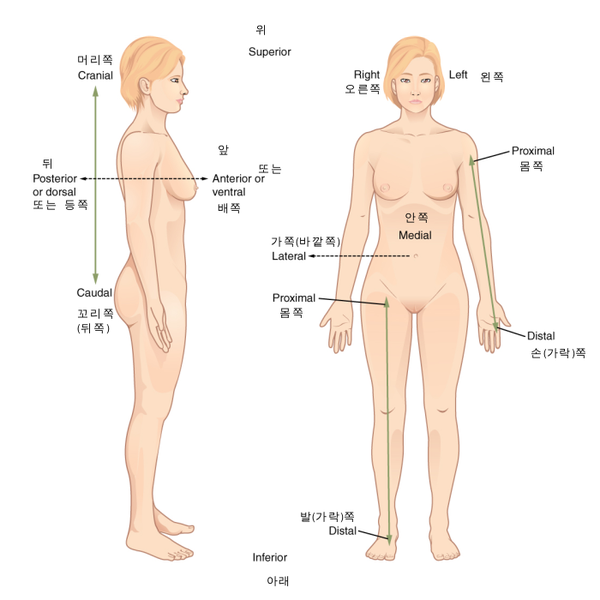

* x-ray의 특성
    * 전자기파가 몸을 통과한 결과를 이미지화 시킨 것
    * 통과하고 남은 전자기파의 결과이기 때문에 색상이 아니라 흑백 명암으로 나오게 된다.
    * 부위에 따라서 명암이 다르게 나온다.
        * 뼈: 하얀색
        * 근육 및 지방: 연한 회색
        * 공기: 검은색(**폐의 경우 공기가 많이 차있으면 검은색으로 나온다.**)

의료 인공지능은 다양한 분야에서 사용된다. 질병의 정확한 분류 또는 환자의 중증도를 확인하는 용도 등 다양한 용도로 사용된다. 그 중 질병을 탐지하는 인공지능이 핫하다. 이번 노드에서는 **폐렴(Pneumonia)**을 찾아내는 딥러닝 모델을 만들어 볼 것임. 그러기 위해 폐렴에 대해 알아보자면,

### 1-3. 폐렴이란?

* 폐렴의 정의?
    * 폐렴(pneumonia 뉴모니아)은 **폐에 염증이 생긴 상태로 중증의 호흡기 감염병이다.** 세균을 통한 감염이 가장 많으며, 바이러스, 균류, 또는 기타 미생물도 원인이 될 수가 있다. 드물게는 알레르기 반응이나 자극적인 화학 물질을 흡입해 발생하기도 한다. 노인이나 어린아이, 혹은 전체적으로 상태가 안 좋은 환자들이나 기침 반사가 약한 사람들에게는 흡인성 폐렴이 발생한다. 그리고 세균이 원인인 경우는 항생제로 치료를 할 수 있다. 항생제가 생기기 전에는 50~90%가 사망할 정도로 위험한 질환이었으나, 현재는 거의 사망하지 않는다. 1940년대에 항생제가 개발되기 전까지는 폐렴 환자의 1/3 정도가 사망하였다. 오늘날에는 적절한 의학적 치료로 폐렴 환자의 95% 이상이 회복된다. 그러나 일부 저개발국(개발 도상국)에서는 폐렴이 여전히 주요 사망 원인 중 하나이다.
    <br>
    <br>
그렇다면 염증이란 무엇인가...?

* 염증
    * **유해한 자극에 대한 생체반응 중 하나로 면역세포, 혈관, 염증 매게체들이 관여하는 보호반응이다.** 염증의 목적은 세포의 손상을 초기 단계에서 억제하고, 상처 부분의 파괴된 조직 및 괴사된 세포를 제거하며, 동시에 조직을 재생하는 것이다. 
    * 쉽게 말해 우리 몸을 지키기 위해 백혈구들이 싸우고 있는 장소라고 할 수 있음.
    * 폐렴은 폐에서 바이러스나 세균으로부터 우리 몸을 지키기 위해 백혈구들이 싸우고 있는 상황.

* 폐렴의 구별법
    * **정상적인 흉부**: 비정상적인 음영 영역이 없는 깨끗한 폐가 보인다.
    * **세균성 폐렴(Bacterial Pneumonia)**: 일반적으로 오른쪽 상부엽(아래 그림에서 흰색 화살표)에 뭐가 보인다.
    * **바이러스성 폐렴(Viral Pneumonia)**: 양쪽 폐에서보다 확산된 'interstitial(조직 사이에 있는)' 패턴으로 나타난다.

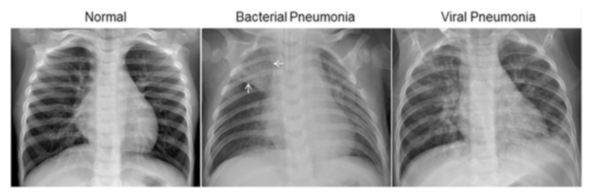

위 사진과 같이 폐렴에 걸린 사진들은 특징이 패턴을 이루고 있는 것을 볼 수 있다. 이제 딥러닝을 활용해서 이런 패턴을 잘 읽어내는 딥러닝 알고리즘을 만들자.

***

## 2. 실습

* 데이터에 대해서
    * 캐글의 Chest X-Ray Images 데이터를 활용
    * 중국 광저우에 있는 광저우 여성 및 어린이 병원의 1~5세 소아 환자의 흉부 X선 영상이다.
    * 3개의 폴더 train, test, val로 구성되고, 각 이미지 카테고리(폐련/정상)이 있음.
    * 5,856개의 X-Ray 이미지(jpeg)와 2개의 범주(폐렴/정상)가 있고 전체 데이터는 1.2gb 가량임.
    * 단, chest_xray 하위에 chest_xray폴더가 중복으로 포함되어 있어 전체 데이터가 2.5gb인 경우가 있는데, 당연히 중복된 데이터는 필요 없음.

### 2-1. Set-up

In [1]:
# 필요한 패키지(라이브러리) import 
import os, re
import random, math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action='ignore')

In [3]:
# 필요한 변수들을 생성한다.
# 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
AUTOTUNE = tf.data.experimental.AUTOTUNE
# X-RAY 이미지 사이즈 변수
IMAGE_SIZE = [180, 180]

# 데이터 경로 변수
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel')
TRAIN_PATH = ROOT_PATH + '/chest_xray/data/train/*/*' # *은 모든 디렉토리와 파일을 의미
VAL_PATH = ROOT_PATH + '/chest_xray/data/val/*/*'
TEST_PATH = ROOT_PATH + '/chest_xray/data/test/*/*'

BATCH_SIZE = 16
EPOCHS = 25

print(ROOT_PATH)

/aiffel/aiffel


### 2-2. 데이터 가져오기

이 데이터셋은 이미 train, val, test로 나누어져 있다.

In [4]:
train_filenames = tf.io.gfile.glob(TRAIN_PATH)
test_filenames = tf.io.gfile.glob(TEST_PATH)
val_filenames = tf.io.gfile.glob(VAL_PATH)

print(len(train_filenames))
print(len(test_filenames))
print(len(val_filenames))

5216
624
16


* tf.io.gfile.glob: 주어진 패턴과 일치하는 파일 목록을 반환한다.
<br>
(https://runebook.dev/ko/docs/tensorflow/io/gfile/glob)

In [5]:
# train 데이터와 validation 데이터를 모두 filenames에 담습니다
filenames = tf.io.gfile.glob(TRAIN_PATH)
filenames.extend(tf.io.gfile.glob(VAL_PATH))

# 모아진 filenames를 8:2로 나눕니다
train_size = math.floor(len(filenames)*0.8)
random.seed(8)
random.shuffle(filenames)
train_filenames = filenames[:train_size]
val_filenames = filenames[train_size:]

print(len(train_filenames))
print(len(val_filenames))

4185
1047


In [7]:
# 파일 경로를 보고 정상 이미지와 폐렴 이미지를 구분할 수 있다.
# 파일 경로에 normal이 있는지 확인하면 정상 이미지를 셀 수 있음
# 당연히 PNEUMONIA가 있으면 폐렴 이미지도 셀 수 있다.
print(f'Normal image path\n{filenames[0]}')
print(f'Pneumonia image path\n{filenames[2000]}')

Normal image path
/aiffel/aiffel/chest_xray/data/train/NORMAL/NORMAL2-IM-1317-0001.jpeg
Pneumonia image path
/aiffel/aiffel/chest_xray/data/train/PNEUMONIA/person299_bacteria_1418.jpeg


In [8]:
# 정상이미지와 폐렴 이미지 세기
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print(f"Normal images count in training set: {COUNT_NORMAL}")


COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print(f"Pneumonia images count in training set: {COUNT_PNEUMONIA}")

Normal images count in training set: 1070
Pneumonia images count in training set: 3115


결과를 보면 정상 이미지보다 폐렴 리미지 수가 3배 정도 더 많다. 이번 노드에서 사용할 CNN모델의 경우 데이터가 클래스별 balance가 좋을수록 training을 잘함. 이 데이서셋의 클래스 불균형은 이후에 조정한다. 단, test, val 데이터셋은 평가하기 위한 용도이고 학습과는 관련이 없으니까 불균형해도 상관없다. 

In [9]:
# tf.data 인스턴스 만들기
# tf.data는 tensorflow에서 학습시킬 때 mini-batch로 작업할 수 있도록 해준다.
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

In [10]:
# train, validation 데이터셋 개수를 확인
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print(f"Training images count: {TRAIN_IMG_COUNT}")

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print(f"Validating images count: {VAL_IMG_COUNT}")

Training images count: 4185
Validating images count: 1047


In [11]:
# 단, 현재 이미지에는 라벨 데이터가 따로 없음
# 파일 경로에 'NORMAL'이나 'PNEUMONIA'가 포함되어 있으니까 이걸 이용해서 라벨 데이터를 만듦
# 파일 경로의 끝에서 두번째 부분을 확인하면 양성과 음성을 구분할 수 있습니다
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # 폐렴이면 양성(True), 노말이면 음성(False)

In [12]:
# 이미지 데이터는 사이즈가 각각 다를 수 있음 -> 비효율적
# 사이즈를 통일하고 메모리를 효율적으로 사용하기 위해 사이즈를 줄일 필요가 있다.
# process_path 함수에서 decode_img 함수를 이용해 이미지의 데이터 타입을 float으로 바꾸고
# 사이즈를 변경
# get_label을 이용해 라벨값을 가져온다.

# 이미지를 알맞은 형식으로 바꿉니다.
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3) # 이미지를 uint8 tensor로 수정
    img = tf.image.convert_image_dtype(img, tf.float32) # float32 타입으로 수정
    img = tf.image.resize(img, IMAGE_SIZE) # 이미지 사이즈를 IMAGE_SIZE로 수정
    return img

# 이미지 파일의 경로를 입력하면 이미지와 라벨을 읽어옵니다.
def process_path(file_path):
    label = get_label(file_path) # 라벨 검출
    img = tf.io.read_file(file_path) # 이미지 읽기
    img = decode_img(img) # 이미지를 알맞은 형식으로 수정
    return img, label

In [13]:
# train, validation 데이터셋을 만든다.
# num_parallel_cell 파라미터에 위에서 할당한 AUTOTUNE 변수를 이용하면 
# 빠르게 데이터를 처리할 수 있음

train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [15]:
# 이미지 리사이즈가 잘 됐는지 확인
# 라벨이 잘 들어갔는지 확인
# train_ds.take(1)은 하나의 데이터만 가져온다는 뜻

for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  False


In [16]:
# test 데이터셋 만들기
# 데이터 개수도 확인

test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

print(TEST_IMAGE_COUNT)

624


* Tensorflow에서는 tf.data 파이프라인을 사용해 학습 데이터를 효율적으로 사용할 수 있도록 해준다. prepare_for_training() 함수를 정의해 데이터를 변환해준다.
    * **파이프라인**
        * 컴퓨터 과학에서 파이프라인(pipeline)은 한 데이터 처리 단계의 출력이 다음 단계의 입력으로 이어지는 형태로 연결된 구조를 가리킨다. 이렇게 연결된 데이터 처리 단계는 한 여러 단계가 서로 동시에, 또는 병렬적으로 수행될 수 있어 효율성의 향상을 꾀할 수 있다. 각 단계 사이의 입출력을 중계하기 위해 버퍼가 사용될 수 있다.(참고의 3번째 링크)
<br>
<br>
* shuffle()을 사용해 고정 크기 버퍼를 유지하고 해당 버퍼에서 무작위로 균일하게 다음 요소를 선택한다.
<br>
<br>
* repeat()을 사용하면 epoch를 진행하면서 여러 번 데이터셋을 불러옴
* repeat()을 사용한 데이터셋의 경우 여러 번 데이터셋을 사용할 수 있게 해준다.
* 100개의 데이터를 10번 반복하면 1000개의 데이터가 필요하게 되는데, repeat()은 자동으로 데이터를 맞춰준다.
<br>
<br>
* batch()는 BATCH_SIZE에서 정한 만큼의 배치로 주어진다.
* 100개의 데이터를 10개의 배치로 나누면 각 배치에는 10개의 데이터로 나뉘게 된다.
<br>
<br>
* prefetch()는 학습 데이터를 나눠서 읽어온다.
* 첫 번째 데이터를 GPU에서 학습하는 동안 두 번째 데이터를 CPU에서 준비할 수 있음
* 이로인해 리소스의 유휴 상태를 줄일 수 있다.
    * **리소스의 유휴 상태**
        * 컴퓨터 처리 장치에서 유휴 또는 아이들(idle)은 어떠한 프로그램에 의해서도 사용되지 않는 상태를 말한다.(자세한 내용은 참고의 4번째 링크를 보자)


In [17]:
def prepare_for_training(ds, shuffle_buffer_size=1000):
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

### 2-3. 데이터 시각화

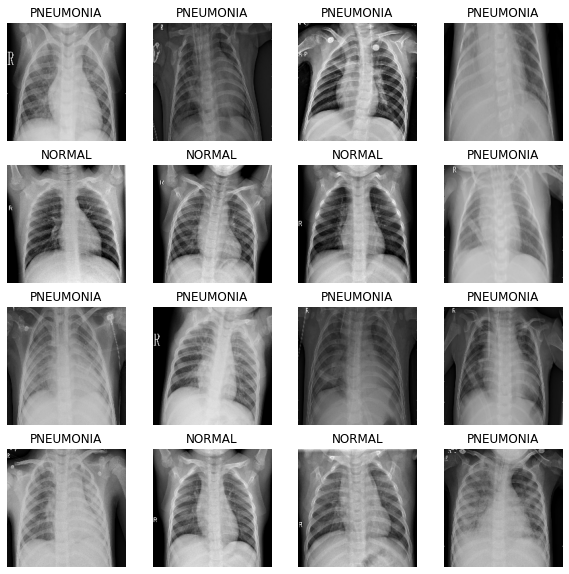

In [18]:
# 데이터를 보기 위해 먼저 train에 있는 batch중 첫 번째 배치를 추출한다.
# 추출된 배치를 image와 label 데이터 셋으로 나눈다.
# show_batch() 함수로 결과 사진을 본다.

# 이미지 배치를 입력하면 여러장의 이미지를 보여줍니다.
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(4,math.ceil(BATCH_SIZE/4),n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")


image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())

### 2-4. CNN 모델링

* CNN 모델에 대해: http://taewan.kim/post/cnn/

In [19]:
# Convolution block을 만든다.
# conv_block()의 구성은 Convolution을 두 번 진행
# Batch Normalization을 통해 Gradient vanishing, Gradient Exploding을 해결
# Max Pooling을 한다.

def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])
    
    return block

In [20]:
# Dense Block

def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

이번 노드에서 만드는 CNN은 전형적인 CNN과는 약간 다르다. 
<br>
<br>
* 두 가지 regularization 기법(Normalization, Dropout)이 동시에 사용되고 있음.
* 일반적으로 잘 사용되지 않거나, 금기시된다고 한다. 논문 참고(https://openaccess.thecvf.com/content_CVPR_2019/papers/Li_Understanding_the_Disharmony_Between_Dropout_and_Batch_Normalization_by_Variance_CVPR_2019_paper.pdf)
    * Batch Normalization은 variance shift(**분산 이동**)를 억제한다.
    * Dropout은 variance shift를 유발한다.
    * 서로 반대되는 효과여서 동시에 사용하는 것이 어울리지 않는다고 함.
    * 단, 두 가지를 같이 쓰는 것이 낫다고 보는 견해도 있다.
    * 예외적으로 동시에 사용하는 것이 성능 향상에 도움을 주는 경우가 실제로 있다. 논문 참고(https://arxiv.org/pdf/1905.05928.pdf)
    * 이번 노드로 두 가지를 함께 사용하는 것이 성능 향상에 도움이 될지 봐야할 듯

In [21]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

### 2-5. 데이터 imbalance 처리

이 데이터는 Normal과 Pneumonia 중 Pneumonia 데이터가 많았는데, 한 라벨이 많을 경우를 **imbalance**하다고 하고, 학습 효과가 좋지 않을 수 있음. 이런 문제를 해결하는 방법으로 **Weight balancing**이라는 테크닉이 사용된다.
<br>
<br>
* Weight balancing(https://3months.tistory.com/414)
    *  training set의 각 데이터에서 loss를 계산할 때 특정 클래스의 데이터에 더 큰 loss값을 갖도록 **가중치를 부여하는 방법.**
    * keras는 model.fit()을 호출할 때 파라미터로 넘기는 class_weight에 이러한 클래스별 가중치를 세팅할 수 있도록 지원한다.

In [23]:
# weight_for_0은 'Normal'이미지에 사용할 weight를 세팅
# weight_for_1은 'Pneumonia'이미지에 사용할 weight를 세팅
# 이 weight들은 'Normal'과 'Pneumonia' 전체 데이터 건수에 반비례하도록 설정된다.
# 즉, 적은 데이터에 weight를 높게 세팅함으로서 학습 비중을 높인다.

weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0 
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for NORMAL: {:.2f}'.format(weight_for_0))
print('Weight for PNEUMONIA: {:.2f}'.format(weight_for_1))

Weight for NORMAL: 1.96
Weight for PNEUMONIA: 0.67


### 2-6. 모델 훈련

In [24]:
# 이미지 훈련은 GPU를 사용하니까 먼저 GPU를 선택한다.
# 모델은 위에서 만들었던 모델 함수인 build_model()을 model에 선언한다.
# 이미지의 라벨이 두 개밖에 없기 때문에 'binary_cross_entropy' loss를 사용.
# optimizer로 'adam'을 사용
# metrics로 'accuracy', 'precision', 'recall'을 사용한다.

with tf.device('/GPU:0'):
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [25]:
# model fit
# 각 파라미터레 위에서 선언한 변수, 데이터셋을 가져와 각각에 맞게 넣어준다.

with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )

Epoch 1/25
261/261 [==============================] - 87s 190ms/step - loss: 0.4109 - accuracy: 0.7941 - precision: 0.9507 - recall: 0.7629 - val_loss: 0.6688 - val_accuracy: 0.7337 - val_precision: 0.7337 - val_recall: 1.0000
Epoch 2/25
261/261 [==============================] - 49s 187ms/step - loss: 0.2421 - accuracy: 0.9035 - precision: 0.9731 - recall: 0.8951 - val_loss: 1.1364 - val_accuracy: 0.7337 - val_precision: 0.7337 - val_recall: 1.0000
Epoch 3/25
261/261 [==============================] - 50s 190ms/step - loss: 0.2126 - accuracy: 0.9198 - precision: 0.9744 - recall: 0.9164 - val_loss: 0.2406 - val_accuracy: 0.8837 - val_precision: 0.8636 - val_recall: 0.9987
Epoch 4/25
261/261 [==============================] - 50s 191ms/step - loss: 0.1919 - accuracy: 0.9265 - precision: 0.9762 - recall: 0.9236 - val_loss: 0.1690 - val_accuracy: 0.9452 - val_precision: 0.9972 - val_recall: 0.9279
Epoch 5/25
261/261 [==============================] - 52s 198ms/step - loss: 0.1698 - accura

### 2-7. 결과 확인

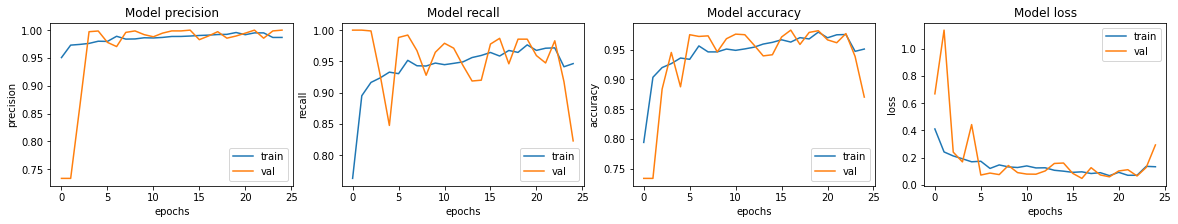

In [26]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [27]:
# 테스트 데이터로 모델 평가
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 [==============================] - 4s 108ms/step - loss: 0.4703 - accuracy: 0.8670 - precision: 0.8847 - recall: 0.9051
Loss: 0.4703139364719391,
Accuracy: 0.8669871687889099,
Precision: 0.8847118020057678,
Recall: 0.9051281809806824


* 성능을 올리기 위해 Data augmentation 방법을 많이 시도한다.(https://hipolarbear.tistory.com/19)
    * 단, 각 데이터에 최적화된 방법을 찾기가 어렵고 제약사항이 많다.
    * 그래서 의료분야에서는 기본적인 Data augmentation 방법들을 많이 사용한다.
    * 이미지 회전, **가우시안 노이즈 추가** 등을 많이 사용.
        * **가우시안 노이즈 추가**(참고 5번째 링크)
            * 가우스 함수에 따른 분포를 따라 이미지에 잡음(노이즈)를 추가한다.
            * 보통 이미지의 압축, 전송 등의 과정에서 일어난다.
            * 이미지가 압축되면서 이미지가 줄어들고, 이후 다시 복구하는 과정에서 원래의 화소값이 아닌 오차가 생기는데, 이렇게 생기는 노이즈가 가우시안 노이즈이다.
            * 전송의 경우 압축을 한 후에 전송을 하는데, 압축과 복원에서 아무 문제가 없더라도 전송 과정에서 오류가 발생하면 가우시안 노이즈가 발생할 수 있다.
            * **이런 노이즈를 의도적으로 추가해 새로운 데이터를 만들어낸다.**(데이터 뻥튀기)
    * 장기의 크기는 사람마다 거의 같은데, 이런 특성을 이용한 방법이 노이즈 추가 방법이다.
    * 전통적인 Data augmentation 방법 이외에도 GAN을 이용해 시도하는 연구들도 있음.
    

***

# 3. 프로젝트

* 루브릭
    * 모델 학습이 안정적으로 수렴하는 것을 시각화를 통해 확인하였다.
    * regularization, augmentation, 등의 기법의 사용 여부에 따른 모델 성능 측정이 ablation study 형태로 체계적으로 수행되었다.
    * Accuracy 기준 85%에 도달하였다.

### 3-1. set-up

In [51]:
# 필요한 패키지(라이브러리) import 
import os, re
import random, math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action='ignore')

In [52]:
# 필요한 변수들을 생성한다.
# 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
AUTOTUNE = tf.data.experimental.AUTOTUNE
# X-RAY 이미지 사이즈 변수
IMAGE_SIZE = [180, 180]

# 데이터 경로 변수
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel')
TRAIN_PATH = ROOT_PATH + '/chest_xray/data/train/*/*' # *은 모든 디렉토리와 파일을 의미
VAL_PATH = ROOT_PATH + '/chest_xray/data/val/*/*'
TEST_PATH = ROOT_PATH + '/chest_xray/data/test/*/*'

# 배치 사이즈, 에포크를 각각 64, 35로 바꾼다.
BATCH_SIZE = 64
EPOCHS = 35

print(ROOT_PATH)

/aiffel/aiffel


### 3-2. 데이터 준비하기

In [53]:
train_filenames = tf.io.gfile.glob(TRAIN_PATH)
test_filenames = tf.io.gfile.glob(TEST_PATH)
val_filenames = tf.io.gfile.glob(VAL_PATH)

print(len(train_filenames))
print(len(test_filenames))
print(len(val_filenames))

5216
624
16


In [54]:
# train 데이터와 validation 데이터를 모두 filenames에 담습니다
filenames = tf.io.gfile.glob(TRAIN_PATH)
filenames.extend(tf.io.gfile.glob(VAL_PATH))

# 모아진 filenames를 8:2로 나눕니다
train_size = math.floor(len(filenames)*0.8)
random.seed(8)
random.shuffle(filenames)
train_filenames = filenames[:train_size]
val_filenames = filenames[train_size:]

print(len(train_filenames))
print(len(val_filenames))

4185
1047


In [55]:
# 파일 경로를 보고 정상 이미지와 폐렴 이미지를 구분할 수 있다.
# 파일 경로에 normal이 있는지 확인하면 정상 이미지를 셀 수 있음
# 당연히 PNEUMONIA가 있으면 폐렴 이미지도 셀 수 있다.
print(f'Normal image path\n{filenames[0]}')
print(f'Pneumonia image path\n{filenames[2000]}')

Normal image path
/aiffel/aiffel/chest_xray/data/train/NORMAL/NORMAL2-IM-1317-0001.jpeg
Pneumonia image path
/aiffel/aiffel/chest_xray/data/train/PNEUMONIA/person299_bacteria_1418.jpeg


In [56]:
# 정상이미지와 폐렴 이미지 세기
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print(f"Normal images count in training set: {COUNT_NORMAL}")


COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print(f"Pneumonia images count in training set: {COUNT_PNEUMONIA}")

Normal images count in training set: 1070
Pneumonia images count in training set: 3115


In [57]:
# tf.data 인스턴스 만들기
# tf.data는 tensorflow에서 학습시킬 때 mini-batch로 작업할 수 있도록 해준다.
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

In [58]:
# train, validation 데이터셋 개수를 확인
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print(f"Training images count: {TRAIN_IMG_COUNT}")

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print(f"Validating images count: {VAL_IMG_COUNT}")

Training images count: 4185
Validating images count: 1047


In [59]:
# 단, 현재 이미지에는 라벨 데이터가 따로 없음
# 파일 경로에 'NORMAL'이나 'PNEUMONIA'가 포함되어 있으니까 이걸 이용해서 라벨 데이터를 만듦
# 파일 경로의 끝에서 두번째 부분을 확인하면 양성과 음성을 구분할 수 있습니다
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # 폐렴이면 양성(True), 노말이면 음성(False)

In [60]:
# 이미지 데이터는 사이즈가 각각 다를 수 있음 -> 비효율적
# 사이즈를 통일하고 메모리를 효율적으로 사용하기 위해 사이즈를 줄일 필요가 있다.
# process_path 함수에서 decode_img 함수를 이용해 이미지의 데이터 타입을 float으로 바꾸고
# 사이즈를 변경
# get_label을 이용해 라벨값을 가져온다.

# 이미지를 알맞은 형식으로 바꿉니다.
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3) # 이미지를 uint8 tensor로 수정
    img = tf.image.convert_image_dtype(img, tf.float32) # float32 타입으로 수정
    img = tf.image.resize(img, IMAGE_SIZE) # 이미지 사이즈를 IMAGE_SIZE로 수정
    return img

# 이미지 파일의 경로를 입력하면 이미지와 라벨을 읽어옵니다.
def process_path(file_path):
    label = get_label(file_path) # 라벨 검출
    img = tf.io.read_file(file_path) # 이미지 읽기
    img = decode_img(img) # 이미지를 알맞은 형식으로 수정
    return img, label

In [61]:
# train, validation 데이터셋을 만든다.
# num_parallel_cell 파라미터에 위에서 할당한 AUTOTUNE 변수를 이용하면 
# 빠르게 데이터를 처리할 수 있음

train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [62]:
# 이미지 리사이즈가 잘 됐는지 확인
# 라벨이 잘 들어갔는지 확인
# train_ds.take(1)은 하나의 데이터만 가져온다는 뜻

for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  False


In [63]:
# 데이터 수를 늘려주기 위해 augmentation 진행
# 의료 영상은 구분하기 어려운 미묘한 차이를 봐야하는데 노이즈와 같은 augmentation을 수행하면
# 오히려 학습에 방해가 될 수 있음.
# 그래서 좌우 반전 정도만 수행.

def augment(image,label):
    image = tf.image.random_flip_left_right(image)  # 랜덤하게 좌우를 반전
    return image,label

def prepare_for_training(ds, shuffle_buffer_size=1000):
    # augment 적용 부분이 배치처리 함수에 추가
    ds = ds.map(
            augment,       # augment 함수 적용
            num_parallel_calls=2
        )
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

In [64]:
# test 데이터셋 만들기
# 데이터 개수도 확인

test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

print(TEST_IMAGE_COUNT)

624


### 3-3. 데이터 시각화

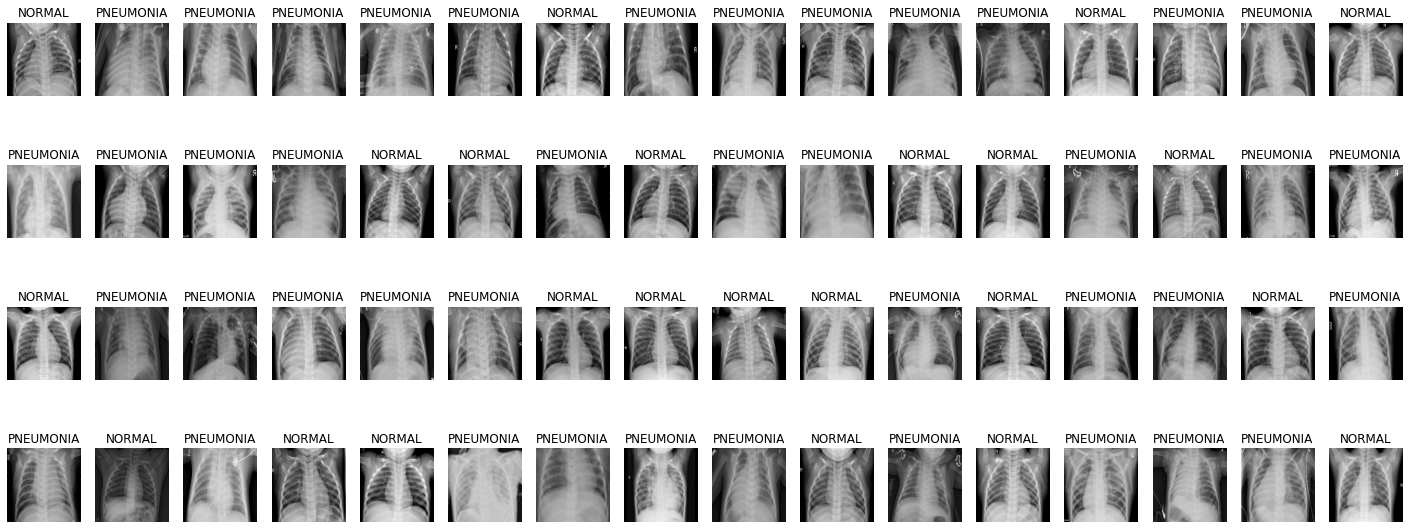

In [65]:
# 데이터를 보기 위해 먼저 train에 있는 batch중 첫 번째 배치를 추출한다.
# 추출된 배치를 image와 label 데이터 셋으로 나눈다.
# show_batch() 함수로 결과 사진을 본다.

# 이미지 배치를 입력하면 여러장의 이미지를 보여줍니다.
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(25,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(4,math.ceil(BATCH_SIZE/4),n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")


image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())

augmentation을 통해 데이터가 늘어난 것을 확인할 수 있다.

### 3-4. CNN 모델링
<br>
<br>
앞선 실습에서 BatchNormalization과 Dropout을 같이 쓰는 방식이 일반적이지 않다는 것을 알게 됐다. 그래서 각각을 쓰지 않은 CNN도 모델링 해본 후 학습을 진행.

### 3-4-1. Batch Normalization과 Dropout 모두 사용한 CNN 모델링

In [66]:
# Convolution block을 만든다.
# conv_block()의 구성은 Convolution을 두 번 진행
# Batch Normalization을 통해 Gradient vanishing, Gradient Exploding을 해결
# Max Pooling을 한다.

def conv_block_both(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])
    
    return block

# Dense Block

def dense_block_both(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

In [67]:
def build_model_both():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block_both(32),
        conv_block_both(64),
        
        conv_block_both(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block_both(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block_both(512, 0.7),
        dense_block_both(128, 0.5),
        dense_block_both(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

### 3-4-2. BatchNormalization만 사용한 CNN 모델링

In [85]:
# dropout을 모두 지운다
def conv_block_bn(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])
    
    return block

def dense_block_bn(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
    ])
    
    return block

In [86]:
def build_model_bn():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block_bn(32),
        conv_block_bn(64),
        
        conv_block_bn(128),
        
        conv_block_bn(256),
        
        tf.keras.layers.Flatten(),
        dense_block_bn(512, 0.7),
        dense_block_bn(128, 0.5),
        dense_block_bn(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

### 3-4-3. Dropout만 사용한 CNN 모델링

In [70]:
# Batchnormalization을 전부 지운다.
def conv_block_dout(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D()
    ])
    
    return block

# Dense Block

def dense_block_dout(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

In [71]:
def build_model_dout():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block_dout(32),
        conv_block_dout(64),
        
        conv_block_dout(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block_dout(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block_dout(512, 0.7),
        dense_block_dout(128, 0.5),
        dense_block_dout(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

### 3-5. 데이터 imbalance 처리

imbalance 처리를 해주기 전에, 데이터가 불균형한 상태로 학습을 한다면 결과가 어떻게 나오는지 확인해보자.<br>(BatchNormalization과 Dropout 모두 사용한 모델로 진행)
<br>
<br>
### 3-5-1. imbalance 처리 없이 학습

In [72]:
with tf.device('/GPU:0'):
    model = build_model_both()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [73]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
    )

Epoch 1/35
65/65 [==============================] - 57s 738ms/step - loss: 0.5294 - accuracy: 0.7822 - precision: 0.9270 - recall: 0.7676 - val_loss: 0.5804 - val_accuracy: 0.7334 - val_precision: 0.7334 - val_recall: 1.0000
Epoch 2/35
65/65 [==============================] - 47s 736ms/step - loss: 0.2792 - accuracy: 0.9065 - precision: 0.9568 - recall: 0.9158 - val_loss: 0.7570 - val_accuracy: 0.7344 - val_precision: 0.7344 - val_recall: 1.0000
Epoch 3/35
65/65 [==============================] - 48s 750ms/step - loss: 0.1842 - accuracy: 0.9423 - precision: 0.9638 - recall: 0.9582 - val_loss: 0.9504 - val_accuracy: 0.7334 - val_precision: 0.7334 - val_recall: 1.0000
Epoch 4/35
65/65 [==============================] - 50s 775ms/step - loss: 0.1482 - accuracy: 0.9529 - precision: 0.9688 - recall: 0.9681 - val_loss: 1.0075 - val_accuracy: 0.7373 - val_precision: 0.7373 - val_recall: 1.0000
Epoch 5/35
65/65 [==============================] - 53s 817ms/step - loss: 0.1233 - accuracy: 0.9550

class_weight() 없이 학습을 진행해서 그런지는 아직 확실하지 않으나, 데이터 개수가 unknown으로 뜬다.<br>
-> **수정: 파일 경로 코드 print(f'Normal image path\n{filenames[0]}') 이 셀을 작성하지 않아서 생긴 문제라는 것을 알았다. 그냥 경로를 확인하는 코드인줄 알았는데 아니었음..아무튼 class_weight() 문제는 아닌걸로!**

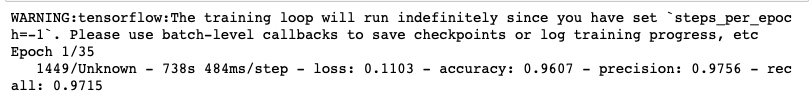

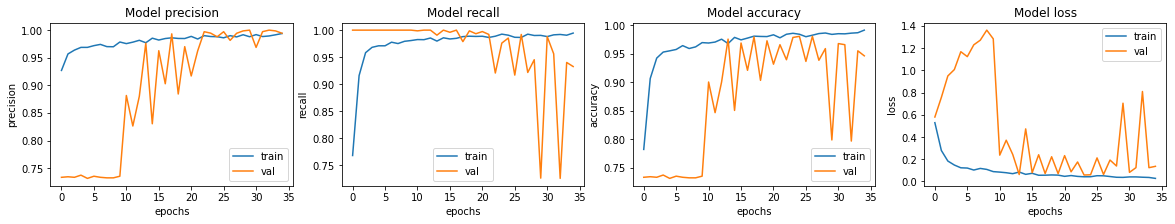

In [74]:
# imbalance 처리 없이 학습한 후 결과 확인
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [75]:
# 테스트 데이터로 모델 평가
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

10/10 [==============================] - 5s 448ms/step - loss: 1.0869 - accuracy: 0.7500 - precision: 0.7250 - recall: 0.9667
Loss: 1.0869240760803223,
Accuracy: 0.75,
Precision: 0.7250000238418579,
Recall: 0.9666666388511658


class_weight()으로 imbalance 처리 없이 학습을 진행한 결과와 실습 결과를 비교
* loss: 0.4703에서 1.0869로 증가
* accuracy: 0.8670에서 0.7500으로 감소
* precision: 0.8847에서 0.7250으로 감소
* recall: 0.9051에서 9667로 증가
<br>
<br>
precision과 recall 수치를 먼저 보면, 
* precision의 경우 **정상 폐를 폐렴으로 잘못판단하는 경우이다.** 수치가 떨어진 것으로 보아 **정상 폐 이미지도 폐렴으로 잘못 예측한 경우가 늘었다고 볼 수 있다.** 
* recall은 수치가 올랐는데, 이는 **폐렴인데 정상 폐로 잘못 판단하는 경우가 적기 때문이다.** 당연히 폐렴 이미지가 더 많으니 폐렴 이미지에 대해서는 정확한 예측을 확률이 높으므로 recall 값이 올라간 것으로 보인다.
<br>
<br>
결론은 precision과 recall 각각의 수치, 그리고 값이 낮을 수록 좋은 loss가 실습에서보다 높게 나온 점, 높을 수록 좋은 accuracy가 실습에서보다 낮게 나온 점으로 보아 imbalance 처리를 해주지 않아 데이터 불균형이 학습의 전반적인 부분에 부정적인 영향을 준 것으로 판단할 수 있을 것 같다.

### 3-5-2. imbalance 처리

In [76]:
# weight_for_0은 'Normal'이미지에 사용할 weight를 세팅
# weight_for_1은 'Pneumonia'이미지에 사용할 weight를 세팅
# 이 weight들은 'Normal'과 'Pneumonia' 전체 데이터 건수에 반비례하도록 설정된다.
# 즉, 적은 데이터에 weight를 높게 세팅함으로서 학습 비중을 높인다.

weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0 
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for NORMAL: {:.2f}'.format(weight_for_0))
print('Weight for PNEUMONIA: {:.2f}'.format(weight_for_1))

Weight for NORMAL: 1.96
Weight for PNEUMONIA: 0.67


### 3-6. 모델 훈련
<br>
3가지 모델(both, only BatchNormalization, only Dropout)을 학습한다.

### 3-6-1. 둘 다 사용한 모델

In [77]:
with tf.device('/GPU:0'):
    model = build_model_both()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [78]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )

Epoch 1/35
65/65 [==============================] - 57s 742ms/step - loss: 0.4485 - accuracy: 0.7546 - precision: 0.9560 - recall: 0.7022 - val_loss: 0.6002 - val_accuracy: 0.7334 - val_precision: 0.7334 - val_recall: 1.0000
Epoch 2/35
65/65 [==============================] - 47s 725ms/step - loss: 0.2277 - accuracy: 0.9017 - precision: 0.9790 - recall: 0.8871 - val_loss: 0.6726 - val_accuracy: 0.7363 - val_precision: 0.7363 - val_recall: 1.0000
Epoch 3/35
65/65 [==============================] - 48s 744ms/step - loss: 0.1790 - accuracy: 0.9317 - precision: 0.9802 - recall: 0.9270 - val_loss: 0.8630 - val_accuracy: 0.7324 - val_precision: 0.7324 - val_recall: 1.0000
Epoch 4/35
65/65 [==============================] - 49s 765ms/step - loss: 0.1493 - accuracy: 0.9481 - precision: 0.9829 - recall: 0.9467 - val_loss: 0.9904 - val_accuracy: 0.7344 - val_precision: 0.7344 - val_recall: 1.0000
Epoch 5/35
65/65 [==============================] - 52s 807ms/step - loss: 0.1340 - accuracy: 0.9483

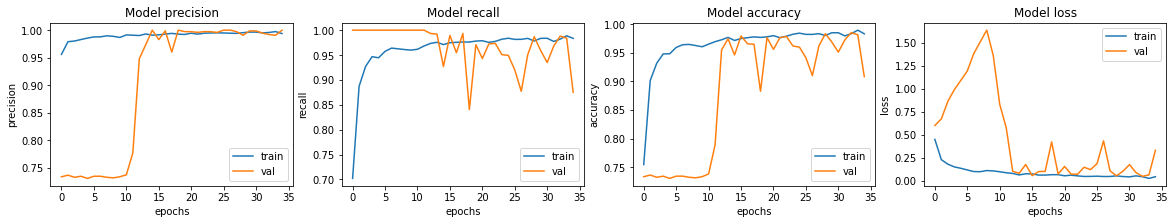

In [79]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [80]:
# 테스트 데이터로 모델 평가
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

10/10 [==============================] - 4s 396ms/step - loss: 0.5289 - accuracy: 0.8702 - precision: 0.8635 - recall: 0.9410
Loss: 0.528889000415802,
Accuracy: 0.870192289352417,
Precision: 0.8635293841362,
Recall: 0.9410256147384644


* Batch Normalization과 Dropout 모두 사용한 모델 학습 결과
<br>
실습 때와 차이점은 딱 하나다. augmentation을 해준 것인데, augmentation 한 후 딱 한 번 학습한 것 만으로 유의미한 차이를 보이는 것은 recall 수치가 약 0.905에서 0.941로 오른 것이다. acc는 약 1정도, precision은 약 2정도 차이로 성능 지표는 큰 차이가 없었고 loss는 오히려 0.47에서 0.52로 올랐다. 
<br>
단, imbalance 처리를 하지 않고 폐렴 이미지 데이터가 월등히 많은 불균형한 데이터로 학습했을 때 recall 수치가 약 0.9666이었던 것을 생각하면 확실히 augmentation을 해주고 학습을 진행하는 것이 좋아보인다. 
<br>
또한 이 모델의 특징인 Batch Normalization과 Dropout을 함께 사용한 것에 대한 부분은 이후 하나씩만 사용한 모델과의 차이를 보면 드러나겠지만 내가 수행한 결과로만 따지면 이번 노드에서는 Batch Normalization과 Dropout을 함께 사용하는 것이 더 좋은 것 같다.

### 3-6-2. only BatchNormalization

In [89]:
with tf.device('/GPU:0'):
    model_bn = build_model_bn()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model_bn.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [90]:
with tf.device('/GPU:0'):
    history = model_bn.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )

Epoch 1/35
65/65 [==============================] - 61s 792ms/step - loss: 0.1907 - accuracy: 0.9286 - precision: 0.9804 - recall: 0.9225 - val_loss: 0.5837 - val_accuracy: 0.7305 - val_precision: 0.7305 - val_recall: 1.0000
Epoch 2/35
65/65 [==============================] - 48s 750ms/step - loss: 0.1019 - accuracy: 0.9639 - precision: 0.9884 - recall: 0.9628 - val_loss: 0.6152 - val_accuracy: 0.7324 - val_precision: 0.7324 - val_recall: 1.0000
Epoch 3/35
65/65 [==============================] - 50s 774ms/step - loss: 0.1020 - accuracy: 0.9630 - precision: 0.9868 - recall: 0.9633 - val_loss: 0.6723 - val_accuracy: 0.7354 - val_precision: 0.7354 - val_recall: 1.0000
Epoch 4/35
65/65 [==============================] - 50s 782ms/step - loss: 0.0739 - accuracy: 0.9750 - precision: 0.9918 - recall: 0.9744 - val_loss: 0.8243 - val_accuracy: 0.7344 - val_precision: 0.7344 - val_recall: 1.0000
Epoch 5/35
65/65 [==============================] - 53s 829ms/step - loss: 0.0678 - accuracy: 0.9748

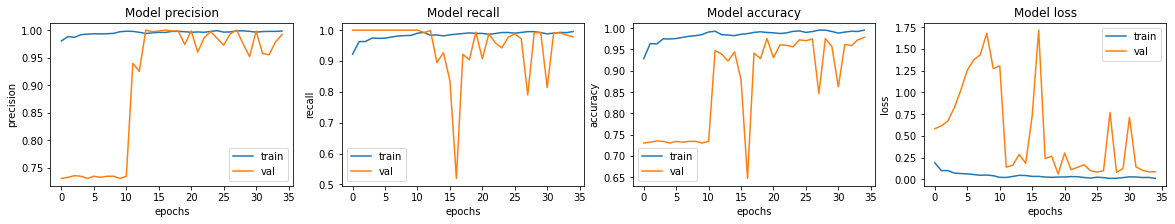

In [91]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [93]:
# 테스트 데이터로 모델 평가
loss, accuracy, precision, recall = model_bn.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

10/10 [==============================] - 4s 405ms/step - loss: 1.3017 - accuracy: 0.7372 - precision: 0.7070 - recall: 0.9897
Loss: 1.3016520738601685,
Accuracy: 0.7371794581413269,
Precision: 0.7069597244262695,
Recall: 0.9897435903549194


결과에 대해 분석해보기 전에 Batch Normalization에 대해 알아볼 필요가 있을 것 같다.
* Batch Normalization
    * 훈련하는 동안 데이터 분포의 평균과 분산이 바뀌더라도 이에 적응해 데이터를 표준 정규화 한다.
    * 즉, 각 층이 활성화 값을 고르게 퍼뜨리도록 강제하는 것
    * 처음부터 훈련셋에 대해 정규화하고 훈련을 시작하는게 아니라, 배치마다 정규화 하는 이유는
        * 매 iteration(iteration수 = 미니 배치 수) 마다, 즉 미니 배치 안의 데이터를 한 번 훑을 때마다 가중지가 업데이트되기 때문에, 그 때마다 정규화 하는게 성능적으로 더 낫다는 것이 밝혀졌기 때문.
    * Batch Normalization은 선형 연산을 적용한 중간 결과에 적용하는 것이 낫다고 한다.
    * 자세한 내용은 참고의 6번째 링크 볼 것.

아직 Batch Normalization과 Dropout에 대해 개념적인 부분 외에는 모르기 때문에, 결과로 나온 성능지표로만 판단해보면, recall외에는 전체적으로 augmentation을 해주기 전 실습 때 결과보다 낮은 수치를 보인다.  

### 3-6-3. only Dropout

In [94]:
with tf.device('/GPU:0'):
    model_dout = build_model_bn()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model_dout.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [95]:
with tf.device('/GPU:0'):
    history = model_dout.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )

Epoch 1/35
65/65 [==============================] - 55s 726ms/step - loss: 0.1922 - accuracy: 0.9202 - precision: 0.9769 - recall: 0.9144 - val_loss: 0.5841 - val_accuracy: 0.7314 - val_precision: 0.7314 - val_recall: 1.0000
Epoch 2/35
65/65 [==============================] - 47s 724ms/step - loss: 0.1286 - accuracy: 0.9526 - precision: 0.9856 - recall: 0.9503 - val_loss: 0.6895 - val_accuracy: 0.7314 - val_precision: 0.7314 - val_recall: 1.0000
Epoch 3/35
65/65 [==============================] - 46s 711ms/step - loss: 0.0946 - accuracy: 0.9680 - precision: 0.9881 - recall: 0.9686 - val_loss: 0.7674 - val_accuracy: 0.7324 - val_precision: 0.7324 - val_recall: 1.0000
Epoch 4/35
65/65 [==============================] - 49s 757ms/step - loss: 0.0811 - accuracy: 0.9697 - precision: 0.9901 - recall: 0.9691 - val_loss: 0.9240 - val_accuracy: 0.7334 - val_precision: 0.7334 - val_recall: 1.0000
Epoch 5/35
65/65 [==============================] - 51s 790ms/step - loss: 0.0736 - accuracy: 0.9728

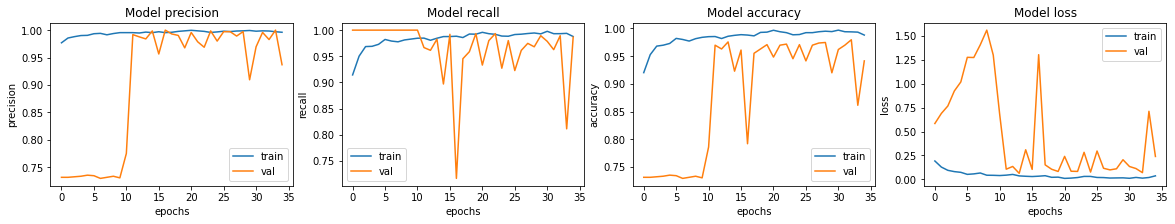

In [96]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [97]:
loss, accuracy, precision, recall = model_dout.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

10/10 [==============================] - 4s 402ms/step - loss: 2.0371 - accuracy: 0.7163 - precision: 0.6912 - recall: 0.9872
Loss: 2.0370543003082275,
Accuracy: 0.7163461446762085,
Precision: 0.6912028789520264,
Recall: 0.9871794581413269


Dropout만으로 학습을 진행했을 때의 결과는 이전 Batch Normalization만 사용했을 때와 양상은 거의 비슷하다. 다만 loss가 약 2.03으로 높게 나왔다.

***

## 4. 마무리

각 학습 과정(only Batch Normalization, only Dropout, both)에 대한 그래프를 전체적으로 봤을 때, precision은 3가지 방식 모두 처음 큰 값으로 오른 후 비교적 안정적인 수치를 기록했다. 하지만 accuracy, recall, loss는 학습 과정에서 큰 폭으로 감소와 증가를 반복하는 것을 확인할 수 있었다. 3가지 방식 중 가장 나은 성능을 보이는 것은 Batch Normalization과 Dropout 모두 사용한 모델이 가장 나은 성능을 보였다.<br>
* Loss: 0.528889000415802
* Accuracy: 0.870192289352417
* Precision: 0.8635293841362
* Recall: 0.9410256147384644

***

## 5. 회고

* 딥러닝 모델 학습에 있어서 가장 중요한 요소 중 하나가 데이터셋의 볼륨이라고 생각하는데, 볼륨이 작을 경우 augmentation을 통해 키워줄 수 있다는 것을 알았다.

* 데이터 불균형이 학습에 어떤 영향을 미치는지 조금은 알게된 것 같다. 또한 weight balancing과 같은 방법으로 imbalance 처리를 해주면 데이터의 불균형을 완화할 수 있다는 것을 알았고 데이터 불균형을 해결하는 데에 다른 방법이 있는지 궁금해졌다.

* BatchNormalization, Dropout을 각각 뺀 자리를 그냥 비워두는 게 맞는지 모르겟다.

* 세가지 방식으로 모델을 구성한 것에 대해서 나온 결과에 확신이 생기지 않는다. 딱 한 번 학습해본 것이기도 하고 맞게 적용했는지에 대한 부분도 확실하지 않아서 일단 결과에 만족하고 이후 진행할 노드에서 조금 더 깊게 알아봐야할 것 같다.

***

* 이미지 출처 및 참고 
    * 이미지 출처
        * https://www.imaginghealthcare.com/diagnostic-imaging/digital-x-ray/
        * https://knuh.kr/content/04information/06_05.asp?sh_d_buseo=&sh_d_body_self=&sh_d_disease=&p_keyword=&sh_name_sort1=%EC%A0%84%EC%B2%B4&sh_name_sort2=&sh_d_num=15
        * https://www.knuh.kr/content/01treatment/04win05.asp
        * https://www.researchgate.net/figure/Sagittal-plane-maximum-intensity-projection-Sagittal-plane-projection-ImageJ-of-the_fig3_336101700
        <br>
        <br>
    * 참고
        * https://ko.wikipedia.org/wiki/%ED%8F%90%EB%A0%B4
        * https://ko.wikipedia.org/wiki/%EC%97%BC%EC%A6%9D
        * https://ko.wikipedia.org/wiki/%ED%8C%8C%EC%9D%B4%ED%94%84%EB%9D%BC%EC%9D%B8_(%EC%BB%B4%ED%93%A8%ED%8C%85)
        * https://ko.wikipedia.org/wiki/%EC%9C%A0%ED%9C%B4_(CPU)
        * https://marisara.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-openCV-10-%EA%B0%80%EC%9A%B0%EC%8B%9C%EC%95%88-%EB%85%B8%EC%9D%B4%EC%A6%88Gaussian-Noise
        * https://mole-starseeker.tistory.com/45